In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X=df.drop('Class',axis=1)
y=df['Class']

print(f"Shape of X : {X.shape}")
print(f"Shape of y : {y.shape}")

Shape of X : (284807, 30)
Shape of y : (284807,)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler_base=StandardScaler()
X[['Time', 'Amount']] = scaler_base.fit_transform(X[['Time', 'Amount']])

In [5]:
import joblib 
joblib.dump(scaler_base,"Scaler_Base.pkl")

['Scaler_Base.pkl']

In [6]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [7]:
#Lightgbm tuning
from sklearn.metrics import make_scorer, average_precision_score,roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (confusion_matrix, classification_report, precision_recall_curve, auc, roc_curve, precision_score, recall_score, f1_score, 
                            roc_auc_score, average_precision_score)

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [8]:
lgbm = LGBMClassifier(class_weight="balanced", random_state=42,n_jobs=-1, n_estimators=1000, learning_rate=0.03,
                     subsample=0.6, max_depth=7, colsample_bytree=0.6, reg_lambda=0.1, reg_alpha=0.1)
lgbm.fit(X, y)

[LightGBM] [Info] Number of positive: 492, number of negative: 284315
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 284807, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,7
,learning_rate,0.03
,n_estimators,1000
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [9]:
import joblib
joblib.dump(lgbm,"lgbm_Base_model.pkl")

['lgbm_Base_model.pkl']

In [10]:
#Xgboost 
num_neg = (y == 0).sum()
num_pos = (y == 1).sum()
scale_pos_weight = num_neg / num_pos
print("scale_pos_weight:", scale_pos_weight)

xgb = XGBClassifier(random_state=42, eval_metric="aucpr", scale_pos_weight=scale_pos_weight, n_jobs=-1, n_estimators=1000, learning_rate=0.03,
                   reg_lambda=0.1, reg_alpha=0.1, max_depth=7, gamma=0.2, colsample_bytree=0.8)

xgb.fit(X, y)

scale_pos_weight: 577.8760162601626


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'aucpr'


In [11]:
joblib.dump(xgb, "Xgb_Base_model.pkl")

['Xgb_Base_model.pkl']

In [12]:
#stacking and ensemble

In [13]:
oof_preds_xgb=np.zeros(len(y))
oof_preds_lgbm=np.zeros(len(y))

In [14]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [15]:
for train_idx, val_idx in kf.split(X, y):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    xgb.fit(X_tr, y_tr)
    lgbm.fit(X_tr,y_tr)

    # Store OOF predictions at validation indices
    oof_preds_xgb[val_idx] = xgb.predict_proba(X_val)[:, 1]
    oof_preds_lgbm[val_idx]  = lgbm.predict_proba(X_val)[:,1]

meta_X_train = np.column_stack((oof_preds_xgb, oof_preds_lgbm))
meta_y_train = y.values

[LightGBM] [Info] Number of positive: 328, number of negative: 189543
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 189871, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [17]:
from sklearn.preprocessing import StandardScaler
scaler_meta=StandardScaler()
meta_X_train=scaler_meta.fit_transform(meta_X_train)

joblib.dump(scaler_meta,"Scaler_meta.pkl")

['Scaler_meta.pkl']

In [18]:
# Neural Networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall

In [19]:
callback=EarlyStopping(monitor='auprc', min_delta=0.001, patience=10, verbose=1, 
                       mode='max', baseline=None, restore_best_weights=False )

In [20]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)
class_weights = dict(enumerate(class_weights))

In [21]:
model=Sequential()
# Input layer + Hidden Layer 1
model.add(Dense(40, input_dim=meta_X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden Layer 2
model.add(Dense(40, activation='relu'))
model.add(BatchNormalization())

# Hidden Layer 3
model.add(Dense(40, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden Layer 4
model.add(Dense(40, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden Layer 5
model.add(Dense(40, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=[
        AUC(name="auc", curve="ROC"),
        AUC(name="auprc", curve="PR"),
        Recall(name="recall")
    ]
)

history = model.fit(
    meta_X_train, meta_y_train,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    class_weight={0:1, 1:10},  # balances minority class importance
    verbose=1)
# class_weight={0:1, 1:10}, 
# callbacks=callback

C:\Users\dhruv\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - auc: 0.8233 - auprc: 0.1845 - loss: 0.2727 - recall: 0.6665 - val_auc: 0.8865 - val_auprc: 0.6268 - val_loss: 0.0252 - val_recall: 0.7467
Epoch 2/30
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - auc: 0.9298 - auprc: 0.5321 - loss: 0.0308 - recall: 0.7820 - val_auc: 0.8865 - val_auprc: 0.6180 - val_loss: 0.0189 - val_recall: 0.7600
Epoch 3/30
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - auc: 0.9366 - auprc: 0.6449 - loss: 0.0279 - recall: 0.7760 - val_auc: 0.9196 - val_auprc: 0.6537 - val_loss: 0.0182 - val_recall: 0.7733
Epoch 4/30
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - auc: 0.9502 - auprc: 0.6789 - loss: 0.0214 - recall: 0.8375 - val_auc: 0.9387 - val_auprc: 0.6552 - val_loss: 0.0103 - val_recall: 0.7600
Epoch 5/30
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - auc: 0.9616 - auprc: 0.7381 - loss: 0.0174 - recall: 0.8139 - val_auc: 0.9386 - val_auprc: 0.6689 - val_loss: 0.0159 - val_recall: 0.7467
Epoch 6/30
1781/1781 ━━━━━━━━━

Text(0.5, 1.0, 'Auc_Ruc')

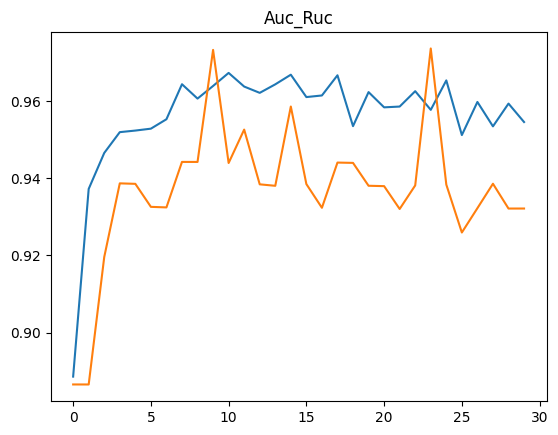

In [22]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title("Auc_Ruc")

In [25]:
model.save("NN_Meta_Model.keras")

In [24]:
#GUI Pipeline 
# data(.csv file ) which is already in pca just like training data -> Scaled some columns in it -> prediction through base model 
# -> stacking those prediction -> Scalling those stacked predicitions -> pass it to the meta model -> final predicitons -> display